<a href="https://colab.research.google.com/github/kakkia/final_project/blob/main/wbs_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pathlib

data = "/content/drive/MyDrive/dataset"
train_ds = pathlib.Path(data)
validation = "/content/drive/MyDrive/validation"
val_ds = pathlib.Path(validation)

In [1]:
from pathlib import Path
import numpy as np
import joblib
from keras.preprocessing import image

import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# parameters for the loader 

batch_size = 32
img_height = 180
img_width = 180

In [4]:
# It's good practice to use a validation split when developing your model. 
# Let's use 80% of the images for training, and 20% for validation.

train_images = tf.keras.utils.image_dataset_from_directory(
  train_ds,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1007 files belonging to 3 classes.
Using 806 files for training.


In [5]:
test_images = tf.keras.utils.image_dataset_from_directory(
  train_ds,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1007 files belonging to 3 classes.
Using 201 files for validation.


In [7]:
class_names = train_images.class_names
print(class_names)

['perfect', 'shoo', 'what']


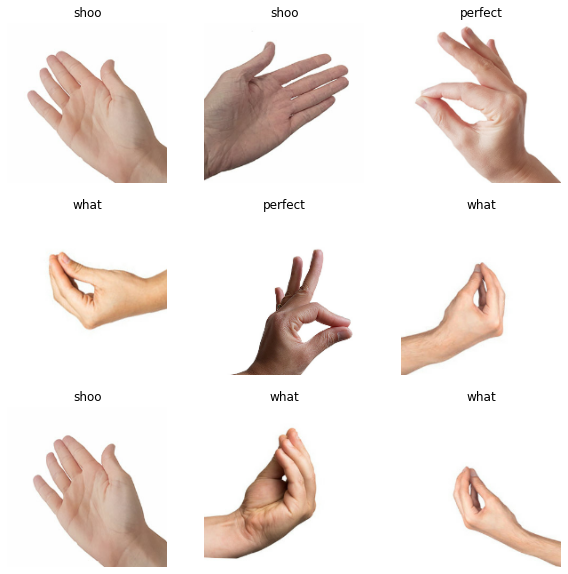

In [8]:
# visualizing the first images from the training dataset 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# i am not converting to np arrays 

In [12]:
# The image_batch is a tensor of the shape (32, 180, 180, 3). 
# This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). 
# The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [15]:
type(image_batch)

tensorflow.python.framework.ops.EagerTensor

In [13]:
image_batch = image_batch.numpy()

In [17]:
type(image_batch)

numpy.ndarray

In [14]:
labels_batch = labels_batch.numpy()

In [19]:
type(labels_batch)

numpy.ndarray

In [20]:
for image_batch, labels_batch in val_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [21]:
type(image_batch)

tensorflow.python.framework.ops.EagerTensor

In [22]:
image_batch = image_batch.numpy()
labels_batch = labels_batch.numpy()

In [23]:
type(image_batch)

numpy.ndarray

In [24]:
type(labels_batch)

numpy.ndarray

In [9]:
# Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch.
# Dataset.prefetch overlaps data preprocessing and model execution while training

AUTOTUNE = tf.data.AUTOTUNE

train_images = train_images.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_images = test_images.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_images.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0013071697 1.0


In [16]:
num_classes = len(class_names)

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.build()

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 64)      

In [20]:
epochs=10
history = model.fit(
  train_images,
  validation_data=test_images,
  epochs=epochs
)

Epoch 1/10
26/26 [==============================] - 31s 787ms/step - loss: 81.7957 - accuracy: 0.3697 - val_loss: 1.0044 - val_accuracy: 0.4925
Epoch 2/10
26/26 [==============================] - 1s 51ms/step - loss: 0.6649 - accuracy: 0.7246 - val_loss: 0.6742 - val_accuracy: 0.7264
Epoch 3/10
26/26 [==============================] - 1s 45ms/step - loss: 0.5690 - accuracy: 0.7754 - val_loss: 0.7238 - val_accuracy: 0.7463
Epoch 4/10
26/26 [==============================] - 1s 44ms/step - loss: 0.3152 - accuracy: 0.8672 - val_loss: 0.7516 - val_accuracy: 0.7960
Epoch 5/10
26/26 [==============================] - 1s 44ms/step - loss: 0.2888 - accuracy: 0.8908 - val_loss: 0.7081 - val_accuracy: 0.7910
Epoch 6/10
26/26 [==============================] - 1s 44ms/step - loss: 0.2413 - accuracy: 0.9107 - val_loss: 0.8786 - val_accuracy: 0.8308
Epoch 7/10
26/26 [==============================] - 1s 45ms/step - loss: 0.1304 - accuracy: 0.9529 - val_loss: 0.8347 - val_accuracy: 0.8408
Epoch 8/10

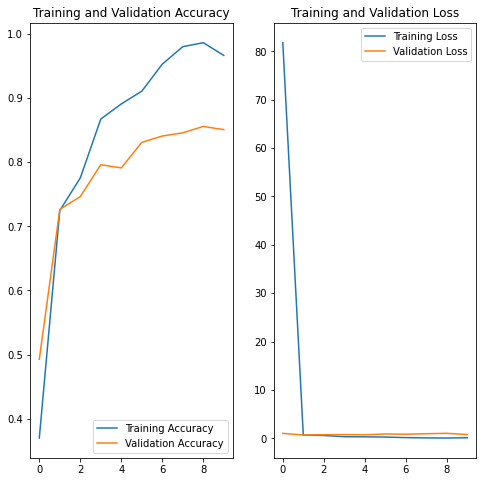

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
model.evaluate(test_images)


7/7 [==============================] - 0s 25ms/step - loss: 0.7614 - accuracy: 0.8507


[0.7613866329193115, 0.8507462739944458]

In [ ]:
# previous model 

In [16]:
# The RGB channel values are in the [0, 255] range.
# This is not ideal for a neural network; in general you should seek to make your input values small.
# Here, you will standardize values to be in the [0, 1] range by using tf.keras.layers.Rescaling in the model 

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [19]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
26/26 [==============================] - 6s 79ms/step - loss: 1.1982 - accuracy: 0.4107 - val_loss: 0.9933 - val_accuracy: 0.5075
Epoch 2/20
26/26 [==============================] - 1s 47ms/step - loss: 0.8080 - accuracy: 0.6365 - val_loss: 0.7161 - val_accuracy: 0.6667
Epoch 3/20
26/26 [==============================] - 1s 45ms/step - loss: 0.6018 - accuracy: 0.7618 - val_loss: 0.6202 - val_accuracy: 0.7662
Epoch 4/20
26/26 [==============================] - 1s 43ms/step - loss: 0.3959 - accuracy: 0.8672 - val_loss: 0.5895 - val_accuracy: 0.7662
Epoch 5/20
26/26 [==============================] - 1s 43ms/step - loss: 0.2972 - accuracy: 0.8983 - val_loss: 0.5470 - val_accuracy: 0.8060
Epoch 6/20
26/26 [==============================] - 1s 43ms/step - loss: 0.1937 - accuracy: 0.9392 - val_loss: 0.4610 - val_accuracy: 0.8507
Epoch 7/20
26/26 [==============================] - 1s 43ms/step - loss: 0.1046 - accuracy: 0.9628 - val_loss: 0.4201 - val_accuracy: 0.8706
Epoch 8/20
26

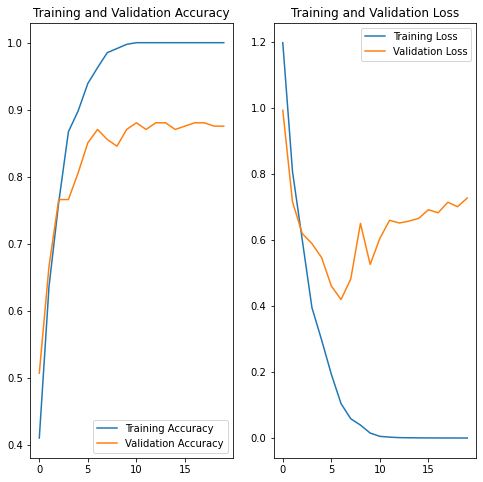

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1)
  ]
)

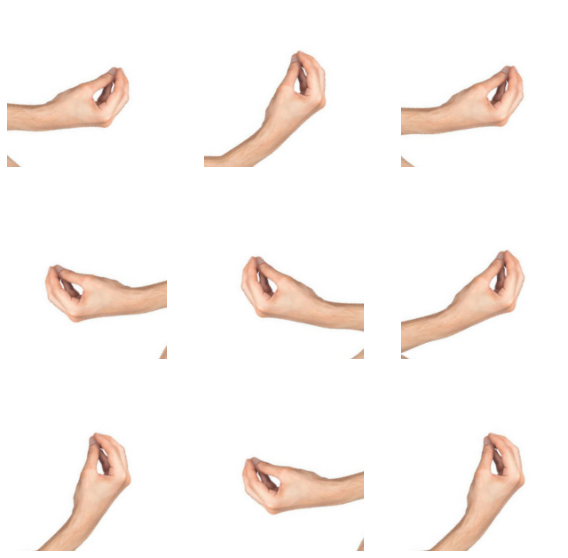

In [22]:
# visualizing augmented examples 

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [23]:
# reducing overfitting with dropout 

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
# compile and train the model 

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [26]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
26/26 [==============================] - 2s 59ms/step - loss: 1.2653 - accuracy: 0.3127 - val_loss: 1.0898 - val_accuracy: 0.2935
Epoch 2/15
26/26 [==============================] - 1s 47ms/step - loss: 1.0354 - accuracy: 0.4417 - val_loss: 1.0038 - val_accuracy: 0.4925
Epoch 3/15
26/26 [==============================] - 1s 47ms/step - loss: 0.8979 - accuracy: 0.5670 - val_loss: 0.8084 - val_accuracy: 0.6318
Epoch 4/15
26/26 [==============================] - 1s 47ms/step - loss: 0.7367 - accuracy: 0.6625 - val_loss: 0.6773 - val_accuracy: 0.6965
Epoch 5/15
26/26 [==============================] - 1s 48ms/step - loss: 0.6410 - accuracy: 0.6985 - val_loss: 0.5896 - val_accuracy: 0.7363
Epoch 6/15
26/26 [==============================] - 1s 48ms/step - loss: 0.6171 - accuracy: 0.7382 - val_loss: 0.6902 - val_accuracy: 0.7264
Epoch 7/15
26/26 [==============================] - 1s 47ms/step - loss: 0.5338 - accuracy: 0.7730 - val_loss: 0.4185 - val_accuracy: 0.8408
Epoch 8/15
26

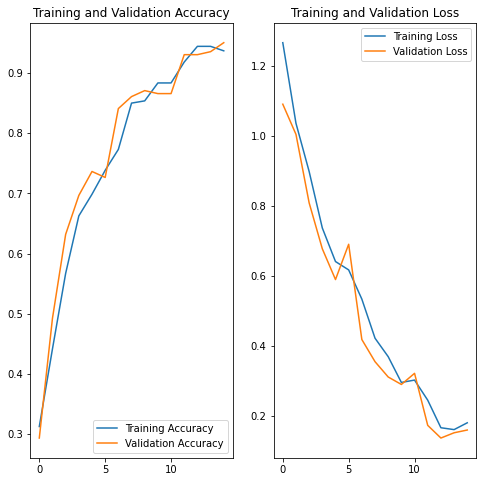

In [27]:
# visualizing the results 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
# predicting new data not included in the training or validation sets

prediction = "/content/drive/MyDrive/validation/perfect/perfect1.jpg"

img = tf.keras.utils.load_img(
    prediction, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to perfect with a 95.35 percent confidence.


In [29]:
# predicting new data not included in the training or validation sets

prediction = "/content/drive/MyDrive/validation/shoo/shoo2.jpg"

img = tf.keras.utils.load_img(
    prediction, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to perfect with a 100.00 percent confidence.


In [30]:
# predicting new data not included in the training or validation sets

prediction = "/content/drive/MyDrive/validation/what/24what.jpg"

img = tf.keras.utils.load_img(
    prediction, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to what with a 99.54 percent confidence.


In [ ]:
pip install pyyaml h5py  # Required to save models in HDF5 format

In [32]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_ds,   
          epochs=10,
          validation_data=val_ds,
          callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/10
26/26 [==============================] - ETA: 0s - loss: 0.1281 - accuracy: 0.9578
Epoch 1: saving model to training_1/cp.ckpt
26/26 [==============================] - 2s 62ms/step - loss: 0.1281 - accuracy: 0.9578 - val_loss: 0.1350 - val_accuracy: 0.9552
Epoch 2/10
25/26 [===========================>..] - ETA: 0s - loss: 0.1517 - accuracy: 0.9457
Epoch 2: saving model to training_1/cp.ckpt
26/26 [==============================] - 1s 53ms/step - loss: 0.1571 - accuracy: 0.9429 - val_loss: 0.0948 - val_accuracy: 0.9751
Epoch 3/10
26/26 [==============================] - ETA: 0s - loss: 0.1086 - accuracy: 0.9628
Epoch 3: saving model to training_1/cp.ckpt
26/26 [==============================] - 1s 54ms/step - loss: 0.1086 - accuracy: 0.9628 - val_loss: 0.1035 - val_accuracy: 0.9602
Epoch 4/10
25/26 [===========================>..] - ETA: 0s - loss: 0.0947 - accuracy: 0.9690
Epoch 4: saving model to training_1/cp.ckpt
26/26 [==============================] - 1s 52ms/step - lo

In [33]:
import os

os.listdir(checkpoint_dir)


['checkpoint', 'cp.ckpt.index', 'cp.ckpt.data-00000-of-00001']

In [34]:
# Evaluate the model
loss, acc = model.evaluate(val_ds, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

7/7 - 0s - loss: 0.0633 - accuracy: 0.9751 - 167ms/epoch - 24ms/step
Untrained model, accuracy: 97.51%


In [35]:
# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(val_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

7/7 - 0s - loss: 0.0633 - accuracy: 0.9751 - 164ms/epoch - 23ms/step
Restored model, accuracy: 97.51%


In [36]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')
